In [0]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

learning_rate=0.1
training_epochs=2000

In [0]:
x1_label1 =np.random.normal(3,1,1000)
x2_label1 =np.random.normal(2,1,1000)
x1_label2 = np.random.normal(7,1,1000)
x2_label2 = np.random.normal(6,1,1000)
x1s = np.append(x1_label1,x1_label2)
x2s = np.append(x2_label1,x2_label2)
ys=np.asarray([0.]*len(x1_label1)+[1.]*len(x1_label2))

In [33]:
ys

array([0., 0., 0., ..., 1., 1., 1.])

In [0]:
X1=tf.placeholder(tf.float32,shape=(None,),name="x1")
X2=tf.placeholder(tf.float32,shape=(None,),name="x2")
Y=tf.placeholder(tf.float32,shape=(None,),name="y")
w=tf.Variable([0.,0.,0.],name="w",trainable = True)

y_model=tf.sigmoid((w[2]*X2+w[1]*X1+w[0]))
cost = tf.reduce_mean(-tf.log(y_model) * Y - tf.log (1 - y_model) * (1 - Y))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)



In [35]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  prev_loss= 0
  for epoch in range(training_epochs):
    loss,_ = sess.run([cost,train_op],{X1 : x1s,X2 : x2s, Y : ys})
   
    if epoch % 100 ==0:
      print(epoch, loss)
    if abs(prev_loss -loss)< 0.000001:
      break
    prev_loss=loss
  w_val=sess.run(w, {X1: x1s,X2:x2s, Y: ys})

1800 0.060324963
1900 0.058092747
0 0.69314724
100 0.3734815
200 0.27167717
300 0.21350303
400 0.17654523
500 0.15117787
600 0.13273357
700 0.11872519
800 0.1077204
900 0.09884066
1000 0.09151866
1100 0.08537236
1200 0.08013553
1300 0.07561665
1400 0.07167479
1500 0.06820375
1600 0.06512203
1700 0.062365994
1800 0.059885316
1900 0.057639632


In [0]:
x1_boundary, x2_boundary = [], []
with tf.Session() as sess:
  for x1_test in np.linspace(0,10,20):
    for x2_test in np.linspace(0,10,20):
      z=sess.run(tf.sigmoid(x2_test*w_val[2]+ x1_test*w_val[1]+w_val[0]))
      if abs(z - 0.5)< 0.05:
        x1_boundary.append(x1_test)
        x2_boundary.append(x2_test)

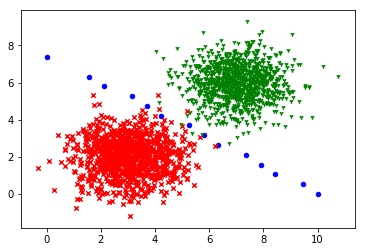

In [37]:
plt.scatter(x1_boundary, x2_boundary, c='b',marker='o',s=20)
plt.scatter(x1_label1, x2_label1, c='r',marker='x',s=20)
plt.scatter(x1_label2, x2_label2, c='g',marker='1',s=20)